In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv("nigerian-songs.csv")
print("Original Data : \n",df)

Original Data : 
                          name                         album  \
0                      Sparky            Mandy & The Jungle   
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity  \
0          Cruel Santino  alternative r&b          2019  144000          48   
1    Odunsi (The Engine)          afropop          2020   89488    

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[: , ("artist_top_genre" , "popularity","danceability" ,"loudness" , "energy", "acousticness")]
y = df["artist_top_genre"]
X['artist_top_genre'] = le.fit_transform(X["artist_top_genre"])
y = le.transform(y)

print("X Part : \n",X)
print("Y Part : \n",y)

X Part : 
      artist_top_genre  popularity  danceability  loudness  energy  \
0                   5          48         0.666    -6.699   0.420   
1                   3          30         0.710    -5.640   0.683   
2                  14          40         0.836    -7.127   0.564   
3                  16          14         0.894    -4.961   0.611   
4                   3          25         0.702    -6.044   0.833   
..                ...         ...           ...       ...     ...   
525                 1          10         0.735    -2.582   0.918   
526                 1           0         0.602    -6.183   0.883   
527                 1           0         0.729    -3.942   0.864   
528                 1           0         0.809    -6.547   0.806   
529                 1           0         0.816    -2.204   0.961   

     acousticness  
0          0.8510  
1          0.0822  
2          0.2720  
3          0.7980  
4          0.1160  
..            ...  
525        0.6320  


In [28]:
from sklearn.cluster import KMeans

noclusters = 3
seed = 0
km = KMeans(n_clusters=noclusters , random_state=seed)
km.fit(X)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2,
       0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

In [29]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Score Is : \n",score)

Score Is : 
 0.5918299843029218


In [30]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


201600.52738003354
54679.221308805456
28855.084320283902


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


19894.878622065065
16501.814117821286
13859.934973803582


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


11803.427627688321
9889.619970847085
8818.978185852702
7950.16062626959


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


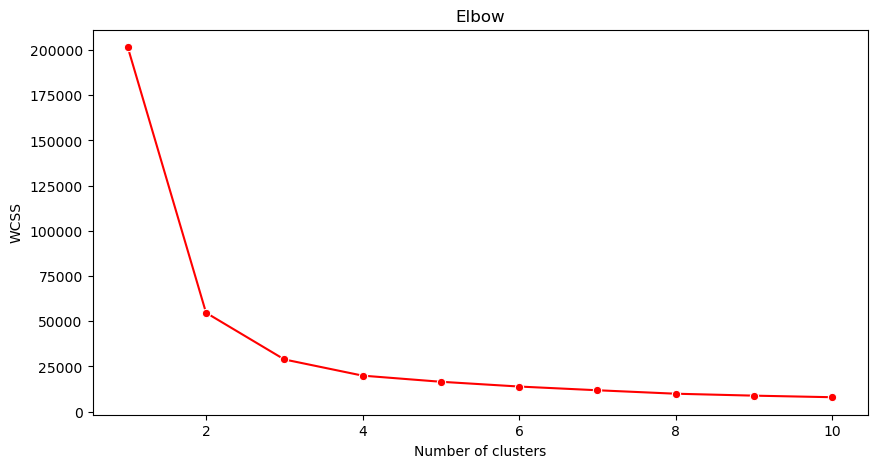

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[1 2 1 0 2 2 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 2 2 1 2 2 0 2 2 1 0 0 1 1 1 2
 1 2 0 1 1 1 2 0 0 1 0 2 2 2 2 0 0 0 0 0 1 2 1 0 2 1 2 0 1 0 1 0 0 0 0 1 0
 2 1 1 2 2 2 0 2 2 0 0 0 0 2 2 0 0 0 1 0 2 2 0 0 0 2 2 0 2 0 1 0 0 0 1 2 0
 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 1 2 0 0 0 0 2 0 0 2 2 2 0 0 2 2 2 0 0 2 0 2
 2 2 0 0 2 2 2 0 2 0 0 2 0 2 0 2 2 0 0 0 2 2 0 0 0 0 2 2 0 2 1 0 0 0 0 0 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 1 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 2
 0 1 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 2 0 1 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 0
 1 2 2 0 0 2 2 2 0 0 2 0 0 0 1 0 0 1 2 2 0 2 0 0 2 0 0 0 0 1 0 0 1 1 1 2 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 2 0 0 2 0 2 0 0 1 0 2 1 1 2 2 2 0
 2 0 2 0 0 0 0 1 0 0 1 1 0 2 1 2 1 0 0 1 1 2 2 2 1 1 0 0 2 2 2 0 0 0 0 0 0
 0 0 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 2 2 2 0 1 0 0 1 0 2 2 2 1 1 1 2 1
 1 1 2 1 1 2 0 2 0 1 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 2 0 0 0 1 

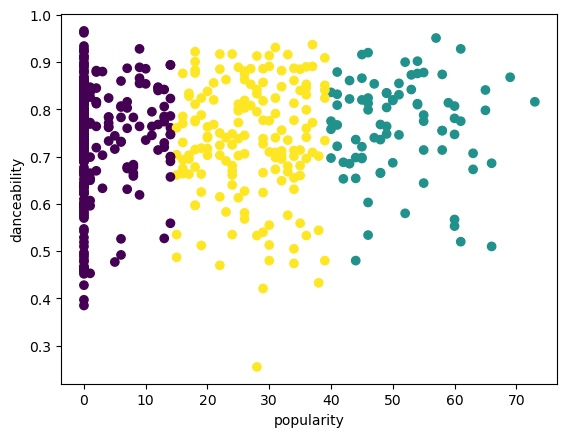

In [41]:
kmeans2 = KMeans(n_clusters=3)
labels = kmeans2.fit_predict(X)
print(labels)
plt.scatter("popularity" , "danceability" , c=labels,data=df)
plt.xlabel("popularity")
plt.ylabel("danceability")
plt.show()

In [42]:
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 86 out of 530 samples were correctly labeled.
Accuracy score: 0.16
